In [1]:
from PIL import Image as image
from PIL import ImageOps as ops
import numpy as maths
import pandas as analytics
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
top = 20
bottom = 5510
left = 12
right = 4930

In [3]:
def window(x,y,req_image,window_size = 5, colour = 0):
    """Window function """

    size = window_size//2

    x_left = x - size
    x_right = x + size
    y_top = y - size
    y_bottom = y + size
    
    if x_left <= left : x_left = left
    if x_right >= right : x_right = right
    if y_top <= top : y_top = top
    if y_bottom >= bottom : y_bottom = bottom

    x_range = maths.arange(x_left,x_right,1)
    y_range = maths.arange(y_top,y_bottom,1)

    for row in x_range :
        for col in y_range:
            req_image.putpixel((row,col),colour)
    return req_image

In [4]:
os.getcwd()

'/home/ashirbad/GitHub/evolutionary_algo_gpu/codes'

In [5]:
path = "../data/pictures"
filename = "large-detailed-administrative-map-of-india-with-major-cities.jpg"
map_with_cities = image.open(os.path.join('..','data','pictures',filename), mode = 'r')

In [6]:
map_with_cities.size

(2176, 2690)

In [7]:
map_cities_gray = ops.grayscale(map_with_cities)
map_cities_gray.save(os.path.join(path,"map_cities_gray.png"))

In [8]:
map_states = image.open(os.path.join(path,"India-map-en.png"))
# map_states

In [9]:
map_states.size

(4965, 5623)

In [10]:
map_states_gray = ops.grayscale(map_states)

In [11]:
map_states_gray = map_states_gray.crop((left,top,right,bottom))
# map_states_gray

In [12]:
min_lng = 68.7
max_lng = 97.25
min_lat = 8.4
max_lat = 37.6

In [13]:
df_coordinates = analytics.read_csv("../data/documents/co-ordinates.csv")
df_coordinates

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Delhi,28.6100,77.2300,India,IN,Delhi,admin,32226000,16753235
1,Mumbai,19.0761,72.8775,India,IN,Mahārāshtra,admin,24973000,12478447
2,Kolkāta,22.5675,88.3700,India,IN,West Bengal,admin,18502000,4496694
3,Bangalore,12.9789,77.5917,India,IN,Karnātaka,admin,15386000,8443675
4,Chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,12395000,6727000
...,...,...,...,...,...,...,...,...,...
146,Kodagihalli,12.9771,77.4651,India,IN,Karnātaka,NaN,2585,2585
147,Harna Buzurg,25.0981,87.0148,India,IN,Bihār,NaN,2579,2579
148,Mailanhalli,13.1863,77.6963,India,IN,Karnātaka,NaN,2543,2543
149,Sultānpur,25.5248,85.2507,India,IN,Bihār,NaN,2473,2473


In [14]:
df_coordinates.sort_values(by = 'lng')

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
32,Rājkot,22.3000,70.7833,India,IN,Gujarāt,NaN,1335397,1335397
7,Ahmedabad,23.0300,72.5800,India,IN,Gujarāt,minor,8009000,5570585
36,Vasai,19.4700,72.8000,India,IN,Mahārāshtra,NaN,1222390,1222390
8,Sūrat,21.1702,72.8311,India,IN,Gujarāt,NaN,6538000,4466826
53,Bhayandar,19.2900,72.8500,India,IN,Mahārāshtra,NaN,809378,809378
...,...,...,...,...,...,...,...,...,...
123,Belgharia,22.5692,88.4846,India,IN,West Bengal,NaN,4193,4193
74,Krishnanagar,23.4000,88.5000,India,IN,West Bengal,NaN,153062,153062
126,Kedihāti,22.6543,88.5304,India,IN,West Bengal,NaN,3910,3910
98,Nagtala,22.3693,88.6071,India,IN,West Bengal,NaN,10419,10419


In [15]:
df_coordinates = df_coordinates[['city','lat','lng']]
df_coordinates.head()

,city,lat,lng
0,Delhi,28.6100,77.2300
1,Mumbai,19.0761,72.8775
2,Kolkāta,22.5675,88.3700
3,Bangalore,12.9789,77.5917
4,Chennai,13.0825,80.2750


In [16]:
df_coordinates['test_lat'] = df_coordinates['lat']
df_coordinates['test_lng'] = df_coordinates['lng']

In [17]:
# df_coordinates['test_lat'] = df_coordinates['test_lat'] - min_lat
# df_coordinates['test_lng'] = df_coordinates['test_lng'] - min_lng
# df_coordinates.head()

In [18]:
df_test = df_coordinates[['city','test_lat','test_lng']]
df_test['lat'] = df_test['test_lat'].apply(lambda x:(round(x,2)))
df_test['lng'] = df_test['test_lng'].apply(lambda x:(round(x,2)))
df_test = df_test[['city','lat','lng']]
df_test = df_test.iloc[df_test[['lat','lng']].drop_duplicates().index.to_list()]
df_test.head()

,city,lat,lng
0,Delhi,28.61,77.23
1,Mumbai,19.08,72.88
2,Kolkāta,22.57,88.37
3,Bangalore,12.98,77.59
4,Chennai,13.08,80.28


In [19]:
map_states_gray_copy = map_states_gray.copy()

In [20]:
df_test = df_test.reset_index(drop = True)

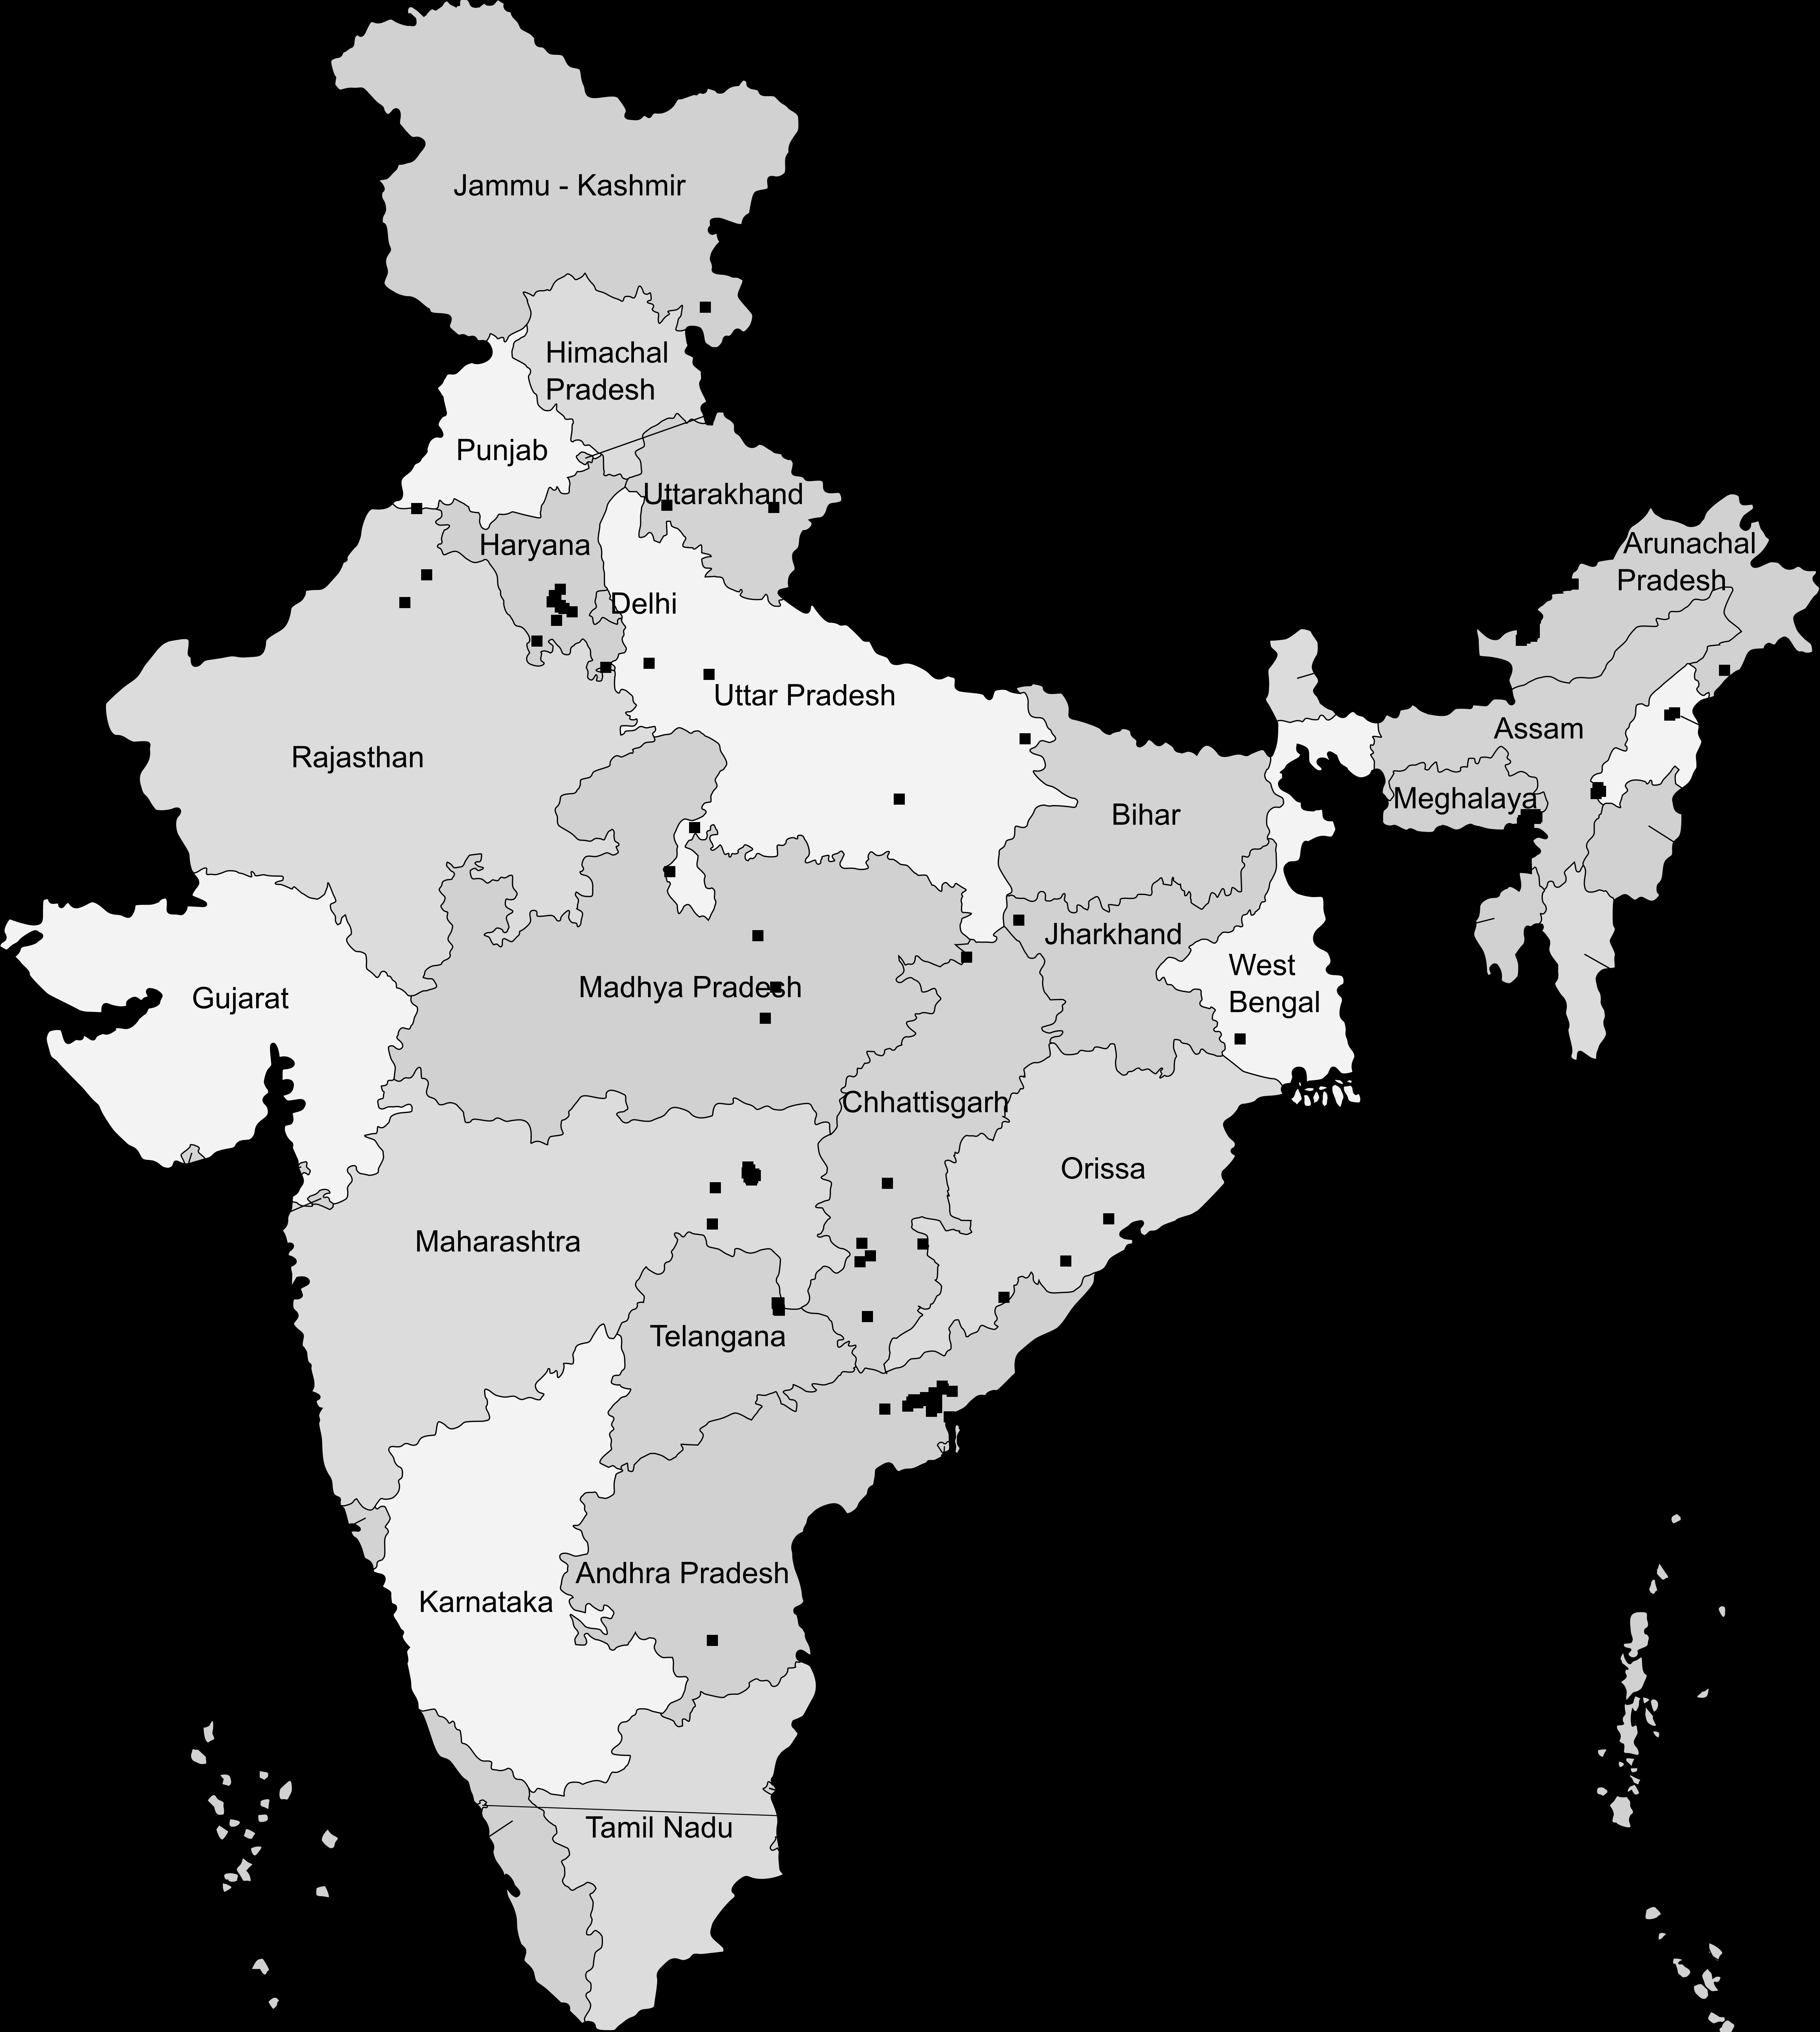

In [21]:
map_states_gray_copy = map_states_gray.copy()
for i in range(len(df_test)):
    lat_c = df_test.iloc[i]['lat']
    lng_c = df_test.iloc[i]['lng']
    lat_on_map = int((max_lat - lat_c)/(max_lat - min_lat) * map_states_gray.size[0])
    lng_on_map = int((lng_c - min_lng)/(max_lng - min_lng) * map_states_gray.size[1]) 
    
    window_size = 31
    colour = 0
    
    map_states_gray_copy = window(lat_on_map,lng_on_map,map_states_gray_copy,window_size,colour)
map_states_gray_copy

In [22]:
assert False

AssertionError: 

# Cities Gray and Other Maps

In [ ]:
map_cities_gray

In [ ]:
interested_pixel_value = map_cities_gray.getpixel((708,263))

In [ ]:
pixels = []
for row in range((map_cities_gray.size[0])) :
    for col in range((map_cities_gray.size[1])):
        if map_cities_gray.getpixel((row,col)) == interested_pixel_value :
            pixels.append((row,col))
            map_cities_gray.putpixel((row,col),255)

In [ ]:
important_pixels = pixels.copy()

In [ ]:
map_cities_gray

In [ ]:
map_states_gray = ops.grayscale(map_states.resize(map_cities_gray.size))

In [ ]:
for pixel in pixels:
    map_states_gray.putpixel(pixel,0)
map_states_gray

In [ ]:
edge_detection = image.open(os.path.join(path,"edge_detection.png"))
edge_detection

In [ ]:
edge_detection = ops.grayscale(edge_detection)

In [ ]:
import numpy as maths

In [ ]:
edge_detection.size

In [ ]:
edge_detection_copy = edge_detection.copy()

In [ ]:
edge_detection = edge_detection_copy

In [ ]:
edge_pixels = []
col = 1315
for i in range(edge_detection.size[0]):
    edge_detection.putpixel((i,col),255)

edge_detection

In [ ]:
box = (0,0,1200,1315)
edge_detection = edge_detection.crop(box)

In [ ]:
edge_detection

In [ ]:
rains_image = image.open(os.path.join(path,"india_STATE CAPITALS_june 2015 rains.jpg"))
rains_image

In [ ]:
rains_image_gray = ops.grayscale(rains_image.getchannel("B"))
rains_image_gray

In [ ]:
rains_image_copy = rains_image_gray.copy()

In [ ]:
rains_image = rains_image_copy

In [ ]:
for row in range(rains_image_gray.size[0]):
    for col in range(rains_image_gray.size[1]):
        if rains_image_gray.getpixel((row,col)) < 110 :
            rains_image_gray.putpixel((row,col),0)
        elif rains_image_gray.getpixel((row,col)) > 120:
        
            rains_image_gray.putpixel((row,col),255)
rains_image_gray

In [ ]:
rains_image_gray_copy = rains_image_gray.copy()

In [ ]:
rains_image_gray.save("rains_image_gray.png")

In [ ]:
rains_image_gray

In [ ]:
rains_image_gray.size

In [ ]:
for row in range(649,rains_image_gray.size[0]):
    for col in range(0,279)    :
        rains_image_gray.putpixel((row,col),255)

rains_image_gray
    